<center><h1>Python NumPy library</h1></center>

## NumPy is the most fundamental package for numeric computing with Python!

* a powerful N-dimensional array object
* sophisticated (broadcasting) functions
* tools for integrating C/C++ and Fortran code
* useful linear algebra, Fourier transform, and random number capabilities

NumPy is licensed under the BSD license, enabling reuse with few restrictions.

https://numpy.org/

* [NumPy cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)

---

This notebook is based on https://github.com/ValRCS/LU-pysem/blob/master/Python%20NumPy.ipynb


### Comes with Anaconda, otherwise pip install NumPy

In [249]:
import numpy as np  # extremely common naming for Numpy to be used as np

In [250]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [251]:
a = np.arange(20).reshape(4,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [252]:
b = np.arange(5,500,10)
b

array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
       135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255,
       265, 275, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385,
       395, 405, 415, 425, 435, 445, 455, 465, 475, 485, 495])

## NumPy arrays

NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers. In NumPy dimensions are called axes.

### In other words think of matrix (2-D, 3-D, etc)  with elements given their coordinates

NumPy’s array class is called ndarray. It is also known by the alias array. Note that numpy.array is not the same as the Standard Python Library class array.array, which only handles one-dimensional arrays and offers less functionality.

In [253]:
type(a),type(b),a.dtype,b.dtype

(numpy.ndarray, numpy.ndarray, dtype('int64'), dtype('int64'))

##  When should you use ndarray instad of normal Python data structures such as list?

* NumPy's arrays are more compact than Python lists (about 3-5x difference)
* Faster access for reading/writing items / less Python "bookkeeping"
* Convencience operations matrix operations/Fourier Transforms/histograms/statistics/filtering/etc
* Spatial locality in memory access patterns results in performance gains notably due to the CPU cache
* Items stored contiguously in memory allow NumPy to take advantage of vectorized instructions of modern CPUs, such as Intel's SSE and AVX, AMD's XOP


* Restriction(uniform data types)


In [254]:
## Litmus test: for group operations use NumPy, if you have many individual operations
## then regular Python lists might suffice

## NOTE: For multiple data types better to use Pandas library(another lecture)

In [255]:
d=a*2
d

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18],
       [20, 22, 24, 26, 28],
       [30, 32, 34, 36, 38]])

In [256]:
c=a**2
c

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196],
       [225, 256, 289, 324, 361]])

In [257]:
# individual elements
c[1,1]

36

In [258]:
c[1]

array([25, 36, 49, 64, 81])

In [259]:
c[:2]

array([[ 0,  1,  4,  9, 16],
       [25, 36, 49, 64, 81]])

In [260]:
c[:,1]

array([  1,  36, 121, 256])

In [261]:
c[::-1]

array([[225, 256, 289, 324, 361],
       [100, 121, 144, 169, 196],
       [ 25,  36,  49,  64,  81],
       [  0,   1,   4,   9,  16]])

In [262]:
c[::-1,::-1]

array([[361, 324, 289, 256, 225],
       [196, 169, 144, 121, 100],
       [ 81,  64,  49,  36,  25],
       [ 16,   9,   4,   1,   0]])

In [263]:
c

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196],
       [225, 256, 289, 324, 361]])

In [264]:
c[:, 1]

array([  1,  36, 121, 256])

In [265]:
c[0:2, 1]

array([ 1, 36])

## Filling arrays with values

In [266]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [267]:
np.zeros((5,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [268]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [269]:
np.ones(5, dtype=int)

array([1, 1, 1, 1, 1])

### Ranges

In [270]:
# integer numbers
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [271]:
np.arange(10000).reshape(100,100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

In [272]:
# floating point numbers
np.linspace(0.0, 1.0, num=5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

### Random numbers

In [273]:
my_csv = np.random.random(36)
my_csv = my_csv.reshape(9,4)

my_csv

array([[0.14636435, 0.88172661, 0.58897425, 0.27097992],
       [0.53287658, 0.57010783, 0.52110629, 0.55017114],
       [0.19344013, 0.17370596, 0.06296861, 0.10911381],
       [0.65521422, 0.53529746, 0.23602948, 0.85293321],
       [0.88237692, 0.62150936, 0.31955649, 0.26291582],
       [0.52469397, 0.90154184, 0.89553196, 0.7229515 ],
       [0.09395231, 0.68349429, 0.98738646, 0.50005832],
       [0.60125374, 0.55765475, 0.36929957, 0.95674832],
       [0.83984099, 0.75194569, 0.97668641, 0.66691648]])

In [274]:
# Let's roll dice

np.random.randint(1, 7, 50)

array([1, 1, 3, 1, 2, 6, 3, 5, 2, 6, 3, 4, 1, 4, 1, 2, 1, 6, 5, 3, 1, 3,
       4, 3, 6, 2, 5, 2, 2, 2, 4, 4, 6, 1, 4, 4, 5, 2, 6, 1, 3, 5, 2, 1,
       1, 1, 1, 4, 5, 3])

In [275]:
# How long time will *many* dice rolls take?

%timeit rolls = np.random.randint(1, 7, 1_000_000)

10.8 ms ± 42 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [276]:
# Let's do the same without NumPy

import random
%timeit rolls_list = [random.randrange(1, 7) for i in range(1_000_000)]

1.26 s ± 25.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Array attributes and operations

In [277]:
dir(a)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [278]:
my_csv.ndim

2

In [279]:
my_csv

array([[0.14636435, 0.88172661, 0.58897425, 0.27097992],
       [0.53287658, 0.57010783, 0.52110629, 0.55017114],
       [0.19344013, 0.17370596, 0.06296861, 0.10911381],
       [0.65521422, 0.53529746, 0.23602948, 0.85293321],
       [0.88237692, 0.62150936, 0.31955649, 0.26291582],
       [0.52469397, 0.90154184, 0.89553196, 0.7229515 ],
       [0.09395231, 0.68349429, 0.98738646, 0.50005832],
       [0.60125374, 0.55765475, 0.36929957, 0.95674832],
       [0.83984099, 0.75194569, 0.97668641, 0.66691648]])

In [280]:
my_csv.T

array([[0.14636435, 0.53287658, 0.19344013, 0.65521422, 0.88237692,
        0.52469397, 0.09395231, 0.60125374, 0.83984099],
       [0.88172661, 0.57010783, 0.17370596, 0.53529746, 0.62150936,
        0.90154184, 0.68349429, 0.55765475, 0.75194569],
       [0.58897425, 0.52110629, 0.06296861, 0.23602948, 0.31955649,
        0.89553196, 0.98738646, 0.36929957, 0.97668641],
       [0.27097992, 0.55017114, 0.10911381, 0.85293321, 0.26291582,
        0.7229515 , 0.50005832, 0.95674832, 0.66691648]])

In [281]:
my_csv.shape

(9, 4)

In [282]:
my_csv.dtype

dtype('float64')

In [283]:
my_csv.itemsize

8

In [284]:
my_csv.data

## Most important array attributes

* ndarray.ndim

the number of axes (dimensions) of the array.
* ndarray.shape

the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. For a matrix with n rows and m columns, shape will be (n,m). The length of the shape tuple is therefore the number of axes, ndim.
* ndarray.size

the total number of elements of the array. This is equal to the product of the elements of shape.
* ndarray.dtype

an object describing the type of the elements in the array. One can create or specify dtype’s using standard Python types. Additionally NumPy provides types of its own. numpy.int32, numpy.int16, and numpy.float64 are some examples.
* ndarray.itemsize

the size in bytes of each element of the array. For example, an array of elements of type float64 has itemsize 8 (=64/8), while one of type complex32 has itemsize 4 (=32/8). It is equivalent to ndarray.dtype.itemsize.
* ndarray.data

the buffer containing the actual elements of the array. Normally, we won’t need to use this attribute because we will access the elements in an array using indexing facilities.

In [285]:
a.ndim

2

In [286]:
a.shape

(4, 5)

In [287]:
a.size

20

In [288]:
a.dtype

dtype('int64')

In [289]:
a.itemsize

8

In [290]:
## NumPy ndarray advantage over normal Python data structures:
#   * efficient and fast 

In [291]:
my_csv.mean()

0.5554812509303569

In [292]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [293]:
a[2,0]=20
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [20, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [294]:
np.median(a)

10.0

In [295]:
np.median(a, axis=1)

array([ 2.,  7., 13., 17.])

In [296]:
np.median(a, axis=0)

array([10. ,  8.5,  9.5, 10.5, 11.5])

In [297]:
np.mean(a, axis=1)

array([ 2.,  7., 14., 17.])

In [298]:
np.mean(a, axis=0)

array([10. ,  8.5,  9.5, 10.5, 11.5])

In [299]:
b

array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
       135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255,
       265, 275, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385,
       395, 405, 415, 425, 435, 445, 455, 465, 475, 485, 495])

In [300]:
b.mean()

250.0

In [301]:
np.median(b)

250.0

In [302]:
b.std() ## standard deviation

144.30869689661813

In [303]:
# 3 dimensions

d=np.arange(90).reshape(3,3,10)
d

array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]],

       [[30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54, 55, 56, 57, 58, 59]],

       [[60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89]]])

In [304]:
d[2,1,5]

75

In [305]:
# 4 dimensions

d.reshape(3,3,2,5)

array([[[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9]],

        [[10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]],

        [[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29]]],


       [[[30, 31, 32, 33, 34],
         [35, 36, 37, 38, 39]],

        [[40, 41, 42, 43, 44],
         [45, 46, 47, 48, 49]],

        [[50, 51, 52, 53, 54],
         [55, 56, 57, 58, 59]]],


       [[[60, 61, 62, 63, 64],
         [65, 66, 67, 68, 69]],

        [[70, 71, 72, 73, 74],
         [75, 76, 77, 78, 79]],

        [[80, 81, 82, 83, 84],
         [85, 86, 87, 88, 89]]]])

### NumPy data types

A frequent error consists in calling array with multiple numeric arguments, rather than providing a single list of numbers as an argument.

In [306]:
# c = np.array(2,3,4,5,6,7)  # WRONG 

# ---------------------------------------------------------------------------
# ValueError                                Traceback (most recent call last)
# <ipython-input-183-6548e3003d99> in <module>
# ----> 1 c = np.array(2,3,4,5,6,7)  # WRONG

# ValueError: only 2 non-keyword arguments accepted



In [307]:
# CORRECT would be
c = np.array([2,3,4,6,7,9,44])
c

array([ 2,  3,  4,  6,  7,  9, 44])

In [308]:
t = np.array([4000000000000,"R"])
t

array(['4000000000000', 'R'], dtype='<U21')

In [309]:
t = np.array((5,6,7,9,1111111111112,0.4))
t

array([5.00000000e+00, 6.00000000e+00, 7.00000000e+00, 9.00000000e+00,
       1.11111111e+12, 4.00000000e-01])

In [310]:
s = np.array(["Hello",'World','''Aha something strange'''])
s

array(['Hello', 'World', 'Aha something strange'], dtype='<U21')

In [311]:
s.itemsize

84

In [312]:
s.dtype

dtype('<U21')

In [313]:
## Can specify array type at creation

In [314]:
c = np.array([[3,4,5], [3,1,6]], dtype=complex)
c

array([[3.+0.j, 4.+0.j, 5.+0.j],
       [3.+0.j, 1.+0.j, 6.+0.j]])

In [315]:
c[0,0].real

3.0

In [316]:
c[0,0].imag

0.0

In [317]:
# c[1,1].imag = 5

# This will not work as .imag only returns the value:

# AttributeError: attribute 'imag' of 'numpy.generic' objects is not writable

In [318]:
c[1,1] = 2 + 3j # use Python complex numbers instead (j for the imaginary part)
c

array([[3.+0.j, 4.+0.j, 5.+0.j],
       [3.+0.j, 2.+3.j, 6.+0.j]])

In [319]:
c.dtype, c.size, c.shape

(dtype('complex128'), 6, (2, 3))

In [320]:
d = np.array([[3+4j,4,5+2.1j], [3,1-3j,6]], dtype=complex)
d

array([[3.+4.j , 4.+0.j , 5.+2.1j],
       [3.+0.j , 1.-3.j , 6.+0.j ]])

In [321]:
d[0,0].real,d[0,0].imag

(3.0, 4.0)

In [322]:
z = np.zeros((5,6))
z[3,3] = 42
print(type(z))
print(z.dtype)
z

<class 'numpy.ndarray'>
float64


array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 42.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [323]:
## Data Type conversion IN PLACE!

In [324]:
z = z.astype(np.int32, copy=True)
print(z.dtype)
z

int32


array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  0],
       [ 0,  0,  0,  0,  0,  0]], dtype=int32)

In [325]:
ones = np.full((5,6), 1, dtype=np.int32)
ones

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]], dtype=int32)

In [326]:
ones=ones+z
ones

array([[ 1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1],
       [ 1,  1,  1, 43,  1,  1],
       [ 1,  1,  1,  1,  1,  1]], dtype=int32)

In [327]:
ones = ones.astype(np.int32, copy=True)
ones

array([[ 1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1],
       [ 1,  1,  1, 43,  1,  1],
       [ 1,  1,  1,  1,  1,  1]], dtype=int32)

In [328]:
ones*z

array([[   0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1806,    0,    0],
       [   0,    0,    0,    0,    0,    0]], dtype=int32)

In [329]:
twos = np.full((5,6), 2, dtype=np.int32)
twos

array([[2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2, 2]], dtype=int32)

In [330]:
ones*twos

array([[ 2,  2,  2,  2,  2,  2],
       [ 2,  2,  2,  2,  2,  2],
       [ 2,  2,  2,  2,  2,  2],
       [ 2,  2,  2, 86,  2,  2],
       [ 2,  2,  2,  2,  2,  2]], dtype=int32)

In [331]:
np.matmul(ones, twos)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 6)

In [332]:
## We have mismatching dimensions for matrix multiplication 

# the number of columns in the first matrix must be equal 
# to the number of rows in the second matrix.

In [334]:
(ones.shape, twos.shape)

((5, 6), (5, 6))

In [335]:
twos.transpose()

array([[2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2],
       [2, 2, 2, 2, 2]], dtype=int32)

In [336]:
mult = np.matmul(ones, twos.transpose())
mult

array([[12, 12, 12, 12, 12],
       [12, 12, 12, 12, 12],
       [12, 12, 12, 12, 12],
       [96, 96, 96, 96, 96],
       [12, 12, 12, 12, 12]], dtype=int32)

In [337]:
mult1 = np.matmul(ones.transpose(), twos)
mult1

array([[10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10],
       [94, 94, 94, 94, 94, 94],
       [10, 10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10, 10]], dtype=int32)

In [338]:
mult.sum(),mult1.sum()

(720, 864)

In [339]:
# Anyone remembers the algorithm for Matrix Multiplication, 
# I don't but NumPy lets us not worry about it :)

In [340]:
np.sqrt(mult)

array([[3.46410162, 3.46410162, 3.46410162, 3.46410162, 3.46410162],
       [3.46410162, 3.46410162, 3.46410162, 3.46410162, 3.46410162],
       [3.46410162, 3.46410162, 3.46410162, 3.46410162, 3.46410162],
       [9.79795897, 9.79795897, 9.79795897, 9.79795897, 9.79795897],
       [3.46410162, 3.46410162, 3.46410162, 3.46410162, 3.46410162]])

In [341]:
mult

array([[12, 12, 12, 12, 12],
       [12, 12, 12, 12, 12],
       [12, 12, 12, 12, 12],
       [96, 96, 96, 96, 96],
       [12, 12, 12, 12, 12]], dtype=int32)

In [342]:
mult**2

array([[ 144,  144,  144,  144,  144],
       [ 144,  144,  144,  144,  144],
       [ 144,  144,  144,  144,  144],
       [9216, 9216, 9216, 9216, 9216],
       [ 144,  144,  144,  144,  144]], dtype=int32)

In [343]:
# np.sin, np.cos, np.exp(power), and so on

### Array stacking and splitting

In [344]:
[1,3,65]+[4,6,7]

[1, 3, 65, 4, 6, 7]

In [345]:
vstack = np.vstack((ones,twos,ones)) # notice the double parenthesis, ie we supply a tuple as an argument!
vstack

array([[ 1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1],
       [ 1,  1,  1, 43,  1,  1],
       [ 1,  1,  1,  1,  1,  1],
       [ 2,  2,  2,  2,  2,  2],
       [ 2,  2,  2,  2,  2,  2],
       [ 2,  2,  2,  2,  2,  2],
       [ 2,  2,  2,  2,  2,  2],
       [ 2,  2,  2,  2,  2,  2],
       [ 1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1],
       [ 1,  1,  1, 43,  1,  1],
       [ 1,  1,  1,  1,  1,  1]], dtype=int32)

In [346]:
hstack = np.hstack((twos,ones,twos))
hstack

array([[ 2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
         2,  2],
       [ 2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
         2,  2],
       [ 2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
         2,  2],
       [ 2,  2,  2,  2,  2,  2,  1,  1,  1, 43,  1,  1,  2,  2,  2,  2,
         2,  2],
       [ 2,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
         2,  2]], dtype=int32)

In [347]:
hsplit = np.hsplit(hstack, 3)
print(type(hsplit))
hsplit

<class 'list'>


[array([[2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2]], dtype=int32), array([[ 1,  1,  1,  1,  1,  1],
        [ 1,  1,  1,  1,  1,  1],
        [ 1,  1,  1,  1,  1,  1],
        [ 1,  1,  1, 43,  1,  1],
        [ 1,  1,  1,  1,  1,  1]], dtype=int32), array([[2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2, 2]], dtype=int32)]

In [348]:
h2 = np.hsplit(hstack, 6)
print(type(h2))
h2

<class 'list'>


[array([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]], dtype=int32), array([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]], dtype=int32), array([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=int32), array([[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        [43,  1,  1],
        [ 1,  1,  1]], dtype=int32), array([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]], dtype=int32), array([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]], dtype=int32)]

In [349]:
## vsplit is similar along vertical axis and array_split lets you specify axis

## View or Shallow Copy

In [350]:
a = np.arange(20).reshape(4,5)

In [351]:
v = a.view()

In [352]:
v

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [353]:
v is a

False

In [354]:
v == a

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [355]:
v.base is a.base

True

In [356]:
v[2,2]=999

In [357]:
v

array([[  0,   1,   2,   3,   4],
       [  5,   6,   7,   8,   9],
       [ 10,  11, 999,  13,  14],
       [ 15,  16,  17,  18,  19]])

In [358]:
a

array([[  0,   1,   2,   3,   4],
       [  5,   6,   7,   8,   9],
       [ 10,  11, 999,  13,  14],
       [ 15,  16,  17,  18,  19]])

In [359]:
s = a[:,1:3]
s

array([[  1,   2],
       [  6,   7],
       [ 11, 999],
       [ 16,  17]])

In [360]:
s.base is a.base

True

In [361]:
s[:] = 55
s

array([[55, 55],
       [55, 55],
       [55, 55],
       [55, 55]])

In [362]:
a

array([[ 0, 55, 55,  3,  4],
       [ 5, 55, 55,  8,  9],
       [10, 55, 55, 13, 14],
       [15, 55, 55, 18, 19]])

In [363]:
b = a

In [364]:
b.base is a.base 

True

### Remember: Slice is a shallow copy to original (ie reference)

## Deep Copy

In [365]:
d = a.copy()
d

array([[ 0, 55, 55,  3,  4],
       [ 5, 55, 55,  8,  9],
       [10, 55, 55, 13, 14],
       [15, 55, 55, 18, 19]])

In [366]:
d.base is a.base

False

In [367]:
d[1,1]=777
d

array([[  0,  55,  55,   3,   4],
       [  5, 777,  55,   8,   9],
       [ 10,  55,  55,  13,  14],
       [ 15,  55,  55,  18,  19]])

In [368]:
a

array([[ 0, 55, 55,  3,  4],
       [ 5, 55, 55,  8,  9],
       [10, 55, 55, 13, 14],
       [15, 55, 55, 18, 19]])

In [369]:
a[:1]

array([[ 0, 55, 55,  3,  4]])

In [370]:
a[0,1]

55

In [371]:
f = d == 55
f

array([[False,  True,  True, False, False],
       [False, False,  True, False, False],
       [False,  True,  True, False, False],
       [False,  True,  True, False, False]])

In [372]:
e = d == a[0,1]
e


array([[False,  True,  True, False, False],
       [False, False,  True, False, False],
       [False,  True,  True, False, False],
       [False,  True,  True, False, False]])

In [373]:
e.dtype

dtype('bool')

### Now d is completely separate object from a !!

In [374]:
## More on copy vs sliceing: https://stackoverflow.com/questions/47181092/numpy-views-vs-copy-by-slicing
# key depends on how you slice
# slice by rows -> view (shallow copy)
# slice by column -> deep copy because not contigous

In [375]:
f=np.ones((5,6), dtype='int32')
f[2,3]=0
f

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]], dtype=int32)

In [376]:
f.nonzero()

(array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
        3, 4, 4, 4, 4, 4, 4]),
 array([0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 4, 5, 0, 1, 2, 3, 4,
        5, 0, 1, 2, 3, 4, 5]))

In [377]:
d.nonzero()

(array([0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]),
 array([1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]))

## Useful NumPy Functions and Methods (there are more!)

* Array Creation

arange, array, copy, empty, empty_like, eye, fromfile, fromfunction, identity, linspace, logspace, mgrid, ogrid, ones, ones_like, r, zeros, zeros_like

* Conversions

ndarray.astype, atleast_1d, atleast_2d, atleast_3d, mat

* Manipulations

array_split, column_stack, concatenate, diagonal, dsplit, dstack, hsplit, hstack, ndarray.item, newaxis, ravel, repeat, reshape, resize, squeeze, swapaxes, take, transpose, vsplit, vstack

* Questions

all, any, nonzero, where

* Ordering

argmax, argmin, argsort, max, min, ptp, searchsorted, sort

* Operations

choose, compress, cumprod, cumsum, inner, ndarray.fill, imag, prod, put, putmask, real, sum

* Basic Statistics

cov, mean, std, var

* Basic Linear Algebra

cross, dot, outer, linalg.svd, vdot

## Boolean Arrays

In [378]:
a

array([[ 0, 55, 55,  3,  4],
       [ 5, 55, 55,  8,  9],
       [10, 55, 55, 13, 14],
       [15, 55, 55, 18, 19]])

In [379]:
b = a > 17
b

array([[False,  True,  True, False, False],
       [False,  True,  True, False, False],
       [False,  True,  True, False, False],
       [False,  True,  True,  True,  True]])

In [380]:
## USeful in assignments

In [381]:
a[b] = 500
a

array([[  0, 500, 500,   3,   4],
       [  5, 500, 500,   8,   9],
       [ 10, 500, 500,  13,  14],
       [ 15, 500, 500, 500, 500]])

In [382]:
a[b]

array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500])

## Automatic Reshaping

In [383]:
arr = np.arange(24)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

### To change the dimensions of an array, you can omit one of the sizes which will then be deduced automatically:

In [384]:
arr.shape = 6, -1
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [385]:
arr.shape = -1, 2
arr

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11],
       [12, 13],
       [14, 15],
       [16, 17],
       [18, 19],
       [20, 21],
       [22, 23]])

## Broadcasting 

* The term broadcasting describes how numpy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes

* usually leads to efficient algorithm implementations.

In [386]:
e = np.arange(6)
f = np.arange(3)*10  #same as np.arange(0,30,10)


In [387]:
e

array([0, 1, 2, 3, 4, 5])

In [388]:
f

array([ 0, 10, 20])

In [389]:
np.arange(0,30,10)

array([ 0, 10, 20])

In [390]:
e + f

ValueError: operands could not be broadcast together with shapes (6,) (3,) 

### General Broadcasting Rules
#### When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions, and works its way forward. Two dimensions are compatible when

* they are equal, or
* one of them is 1

In [392]:
e.reshape(6,1) + f.reshape(1,3)

array([[ 0, 10, 20],
       [ 1, 11, 21],
       [ 2, 12, 22],
       [ 3, 13, 23],
       [ 4, 14, 24],
       [ 5, 15, 25]])

In [393]:
e.reshape(6,1) * f.reshape(1,3)

array([[  0,   0,   0],
       [  0,  10,  20],
       [  0,  20,  40],
       [  0,  30,  60],
       [  0,  40,  80],
       [  0,  50, 100]])

In [394]:
mtab = np.arange(10).reshape(10,1) * np.arange(10).reshape(1,10)
mtab

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

In [395]:
g=np.arange(12)
h=np.arange(4)*100
g,h

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([  0, 100, 200, 300]))

In [396]:
g.reshape(4,3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [397]:
g.reshape(4,3)+h.reshape(4,1)

array([[  0,   1,   2],
       [103, 104, 105],
       [206, 207, 208],
       [309, 310, 311]])

In [398]:
g.reshape(4,3)+50

array([[50, 51, 52],
       [53, 54, 55],
       [56, 57, 58],
       [59, 60, 61]])

## Histograms
### np version only builds the histogram but does not plot it (unlike mathplotlib version)

In [399]:
import matplotlib.pyplot as plt

In [400]:
# Build a vector of 10000 normal deviates with variance 0.5^2 and mean 2
mu, sigma = 2, 0.5
v = np.random.normal(mu,sigma,20000)


In [401]:
v[:20], v.mean(),v.max(),v.min()

(array([2.22143771, 2.72852708, 2.41315905, 2.48164314, 1.81945151,
        2.94288904, 1.70588424, 2.3126269 , 1.91912277, 1.61157878,
        1.42708271, 2.14489643, 2.95316697, 1.50977557, 2.4601917 ,
        1.61755638, 2.09313138, 1.94353677, 1.93969642, 1.30446498]),
 1.995388146653881,
 4.0741557133153385,
 -0.08524428627681813)

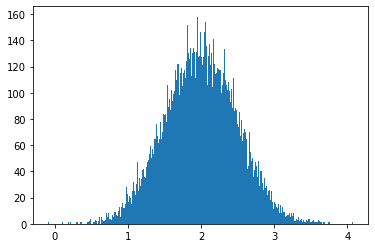

In [405]:
# Plot a normalized histogram with 50 bins
plt.hist(v, bins=500)       # matplotlib version (plot)
plt.show()

In [406]:
# Compute the histogram with numpy and then plot it
(n, bins) = np.histogram(v, bins=500)  # NumPy version (no plot)

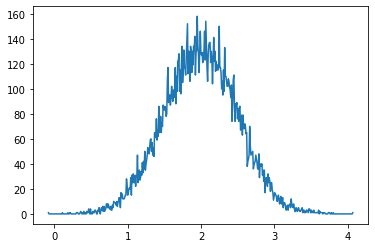

In [407]:
plt.plot(.5*(bins[1:]+bins[:-1]), n)
plt.show()

# Resources / Books

* [Official NumPy Docs](https://docs.scipy.org/doc/numpy/user/index.html)

* [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) # excellent, by the creator of Pandas
* [NumPy Cookbook](https://www.amazon.com/NumPy-Cookbook-Second-Ivan-Idris-ebook/dp/B00WX3W41A) # some good recipes but uneven, this author has many books on NumPy

* [From Python to Numpy](http://www.labri.fr/perso/nrougier/from-python-to-numpy/) # nice free resource 